In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('Train-Set.csv')
test_df = pd.read_csv('Test-Set.csv')

In [3]:
train_df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train_df.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

# Exploratory Data Analysis

In [7]:
cat_var = []
non_cat_var = []
for col in train_df.columns:
    if train_df[col].dtype == 'O':
        cat_var.append(col)
    else:
        non_cat_var.append(col)
print("categorical variables: ",cat_var)
print("non-categorical variables: ",non_cat_var)

categorical variables:  ['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType', 'OutletType']
non-categorical variables:  ['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear', 'OutletSales']


<Axes: >

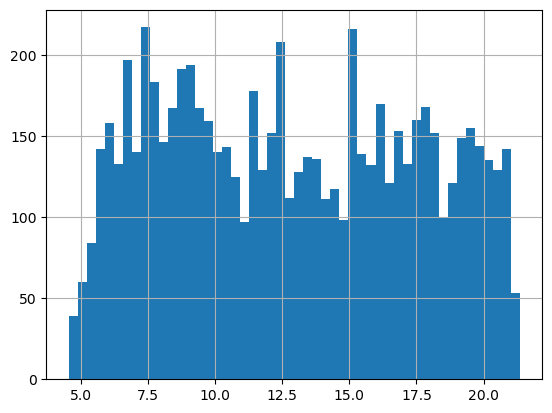

In [8]:
train_df.Weight.hist(bins = 50)

<Axes: >

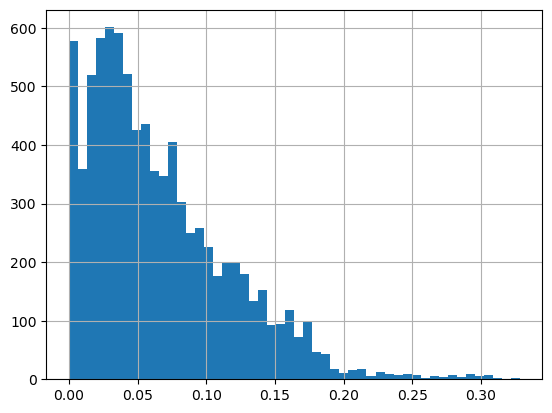

In [9]:
train_df.ProductVisibility.hist(bins = 50)

<Axes: >

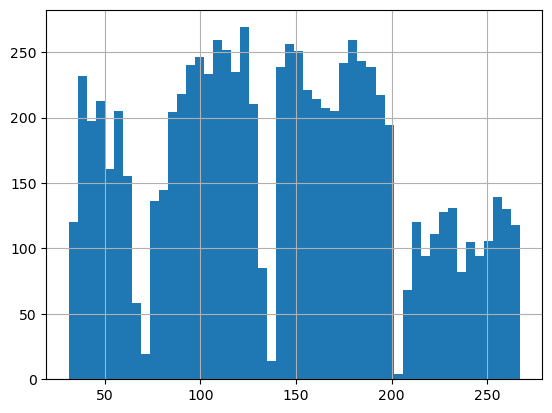

In [10]:
train_df.MRP.hist(bins = 50)

In [11]:
# we can observe, Low fat, LF, low fat convey the same meaning and Regular, reg too
for var in cat_var:
    print(train_df[var].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: ProductID, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: ProductType, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: OutletID, dtype: int64
Medium    2793
Small     2388
Hi

In [12]:
corr_mat = train_df.loc[:, non_cat_var].corr()
corr_mat

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
ProductVisibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
EstablishmentYear,-0.011588,-0.074834,0.005020,1.000000,-0.049135
OutletSales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

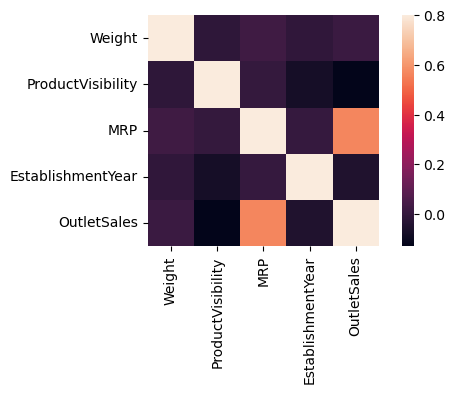

In [13]:
ax=plt.subplots(figsize=(6,3))
sns.heatmap(corr_mat,vmax=0.8,square=True)

In [14]:
# this is not practical
train_df.ProductVisibility.min()

0.0

In [15]:
# # this is our next possible min, we will use this to replace those zeroes
# pv_min = train_df.loc[train_df.ProductVisibility != 0,['ProductVisibility']].min()[0]
# pv_min

In [16]:
train_df.EstablishmentYear.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: EstablishmentYear, dtype: int64

# Preprocessing

In [17]:
train_df.isna().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [18]:
test_df.isna().sum()

ProductID               0
Weight                976
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [19]:
# from sklearn.impute import KNNImputer
# imp_knn = KNNImputer()
# weight_fill_na = train_df.Weight.to_numpy()
# weight_fill_na = weight_fill_na.reshape(-1,1)
# train_df.Weight = imp_knn.fit_transform(weight_fill_na)

In [20]:
train_df.Weight.fillna(train_df.Weight.mean(), inplace=True)
train_df.OutletSize.fillna(train_df.OutletSize.mode()[0], inplace=True)

In [21]:
test_df.Weight.fillna(test_df.Weight.mean(), inplace=True)
test_df.OutletSize.fillna(test_df.OutletSize.mode()[0], inplace=True)

In [22]:
train_df.isna().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [23]:
test_df.isna().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

In [24]:
train_df.FatContent = train_df.FatContent.replace(['LF', 'low fat'], 'Low Fat')
train_df.FatContent = train_df.FatContent.replace(['reg'], 'Regular')
train_df.FatContent.value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

In [25]:
test_df.FatContent = test_df.FatContent.replace(['LF', 'low fat'], 'Low Fat')
test_df.FatContent = test_df.FatContent.replace(['reg'], 'Regular')
test_df.FatContent.value_counts()

Low Fat    3668
Regular    2013
Name: FatContent, dtype: int64

In [26]:
train_df['YearsActive'] = 2013 - train_df['EstablishmentYear']
train_df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales,YearsActive
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [27]:
test_df['YearsActive'] = 2013 - test_df['EstablishmentYear']
test_df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,YearsActive
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,6
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28


In [28]:
train_df.ProductVisibility = train_df.ProductVisibility.replace(0, train_df.ProductVisibility.mean())
train_df.ProductVisibility.min()

0.003574698

In [29]:
test_df.ProductVisibility = train_df.ProductVisibility.replace(0, test_df.ProductVisibility.mean())
test_df.ProductVisibility.min()

0.003589104

# Encoding Categorical Values

In [30]:
X = train_df.drop(['OutletSales'], axis = 1)
y = train_df.OutletSales

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [32]:
col_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ['FatContent', 'ProductType',
       'OutletSize', 'LocationType',
       'OutletType']), remainder = 'passthrough')
col_trans.fit_transform(X)

array([[1.0, 0.0, 0.0, ..., 'OUT049', 1999, 14],
       [0.0, 1.0, 0.0, ..., 'OUT018', 2009, 4],
       [1.0, 0.0, 0.0, ..., 'OUT049', 1999, 14],
       ...,
       [1.0, 0.0, 0.0, ..., 'OUT035', 2004, 9],
       [0.0, 1.0, 0.0, ..., 'OUT018', 2009, 4],
       [1.0, 0.0, 0.0, ..., 'OUT046', 1997, 16]], dtype=object)

# Normalizing Numerical Values

In [33]:
X = train_df.drop(['ProductID', 'OutletID', 'OutletSales', 'EstablishmentYear'], axis = 1)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Selecting Features for our Model

In [35]:
from sklearn.feature_selection import SelectFromModel
# selector = SelectFromModel(estimator=)

# Building the Model

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
model_rf = RandomForestRegressor(n_estimators=50, max_depth=6)
model_linear = LinearRegression()
model_xgb= XGBRegressor(n_estimators = 400, max_depth = 6)

In [39]:
# Random Forest
pipe_rf = make_pipeline(col_trans, scaler, model_rf)
pipe_rf.fit(X_train, y_train)
pipe_rf.score(X_train, y_train), pipe_rf.score(X_test, y_test)

(0.6200228115225164, 0.6034445613092658)

In [40]:
np.sqrt(mean_squared_error(y_train, pipe_rf.predict(X_train))), np.sqrt(mean_squared_error(y_test, pipe_rf.predict(X_test)))

(1049.2709069534644, 1084.9607564285848)

In [41]:
# XGBoost
pipe_xgb = make_pipeline(col_trans, scaler, model_xgb)
pipe_xgb.fit(X_train, y_train)
pipe_xgb.score(X_train, y_train), pipe_xgb.score(X_test, y_test)

(0.9679259381476699, 0.4718276958085639)

In [42]:
np.sqrt(mean_squared_error(y_train, pipe_xgb.predict(X_train))), np.sqrt(mean_squared_error(y_test, pipe_xgb.predict(X_test)))

(304.849754820044, 1252.1313427236712)

In [43]:
pipe_linear = make_pipeline(col_trans, scaler, model_linear)
pipe_linear.fit(X_train, y_train)
pipe_linear.score(X_train, y_train), pipe_linear.score(X_test, y_test)

(0.5600359368056875, 0.5739413101706348)

In [44]:
np.sqrt(mean_squared_error(y_train, pipe_linear.predict(X_train))), np.sqrt(mean_squared_error(y_test, pipe_linear.predict(X_test)))

(1129.0611682729086, 1124.5966573690687)

# Predicting the test data

In [45]:
# we will use Random Forest to predict the test data
X = test_df.drop(['ProductID', 'OutletID', 'EstablishmentYear'], axis = 1)

In [46]:
test_df['PredictedOutletSales'] = pipe_rf.predict(X)
test_df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,YearsActive,PredictedOutletSales
0,FDW58,20.750000,Low Fat,0.016047,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14,1655.583626
1,FDW14,8.300000,Regular,0.019278,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,6,1297.166319
2,NCN55,14.600000,Low Fat,0.016760,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,15,462.622949
3,FDQ58,7.315000,Low Fat,0.066132,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,6,2414.184280
4,FDY38,12.695633,Regular,0.066132,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,5481.657642


In [47]:
test_df['PredictedOutletSales'].to_csv('PredictedOutletSales.csv', index=False)